# Kokoro Imafuku

# **What are the salary levels of workers in the United States and Canada?**

#### Sub Questions:

- In comparison to workers in these North American countries, how much do workers in other countries earn?
- What are the salary levels of workers in other continents like Asia, Europe, South America, and Africa?


In recent years, the impression is that tech industries in North American countries, especially the United States, pay a higher salary to their workers than in other countries. I would like to deconstruct this idea and see if there is an existing relationship between the location of the company and salary in USD. I plan to do this by analyzing the company_location column, and the salary_in_usd column to see the different salary levels in different countries. I would categorize each country, and get the average salary of the workers in that country. I would also graph the different salaries in certain countries, and get both the high and the low-end salaries in that country. Furthermore, I would also analyze the different experience levels, to see if workers of a certain experience level are more likely to work in a certain company_location. 

In [60]:
#load file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/ds_salaries.csv', header = 1)
df = df.drop(columns='Unnamed: 0')

## 1. Summary of dataset

Descibe the dataset of all columns

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [82]:
df.describe(exclude = 'number').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


## 2. Drop unecessary columns from the dataset

I will drop the columns: 'work_year', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_size', 'experience_level', 'salary_currency', 'salary' as I will not need them answering my research question. I will then assign the modified dataset as dfWorld for understandability. 


In [63]:
dfWorld = df.drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_size', 'experience_level', 'salary_currency', 'salary'])
dfWorld

,salary_in_usd,company_location
0,79833,DE
1,260000,JP
2,109024,GB
3,20000,HN
4,150000,US
...,...,...
602,154000,US
603,126000,US
604,129000,US
605,150000,US


## 3. Create dataset for each continent

For simplicity, I have used five continents to categorize all the countries listed on the original dataset. For example, I have categorized Australia as Asia, and New Zealand as Asia.
I have also used the head() method to each dataframe for formatting reasons.

In [97]:
dfNorthAmerica = dfWorld.loc[(df["company_location"] == "US") | (df["company_location"] == "CA")]

dfAsia = dfWorld.loc[(df['company_location'] == "JP") | (df["company_location"] == "NZ") | (df["company_location"] == "IN") | (df["company_location"] == "PK")  | (df["company_location"] == "CN") | (df["company_location"] == "AE") | (df["company_location"] == "SG") | (df["company_location"] == "IQ") | (df["company_location"] == "IL") | (df["company_location"] == "RU") | (df["company_location"] == "IR") | (df["company_location"] == "VN") | (df["company_location"] == "AS") | (df["company_location"] == "MY") | (df["company_location"] == "AU")]

dfEurope = dfWorld.loc[(df['company_location'] == "DE") | (df["company_location"] == "GB") | (df["company_location"] == "HU") | (df["company_location"] == "FR") | (df["company_location"] == "GR") | (df["company_location"] == "NL")  | (df["company_location"] == "AT") | (df["company_location"] == "DK") | (df["company_location"] == "IT") | (df["company_location"] == "HR") | (df["company_location"] == "LU") | (df["company_location"] == "PL") | (df["company_location"] == "RO") | (df["company_location"] == "BE") | (df["company_location"] == "UA") | (df["company_location"] == "MT") | (df["company_location"] == "MD") | (df["company_location"] == "SI") | (df["company_location"] == "CH") | (df["company_location"] == "TR") | (df["company_location"] == "CZ") | (df["company_location"] == "EE") | (df["company_location"] == "IE")]

dfSouthAmerica = dfWorld.loc[(df['company_location'] == "HN") | (df["company_location"] == "MX") | (df["company_location"] == "ES") | (df["company_location"] == "PT") | (df["company_location"] == "BR") | (df["company_location"] == "CL") | (df["company_location"] == "CO")]

dfAfrica = dfWorld.loc[(df['company_location'] == "NG") | (df["company_location"] == "KE") | (df["company_location"] == "DZ")]

dfNorthAmerica.head()


,salary_in_usd,company_location
4,150000,US
5,72000,US
6,190000,US
8,135000,US
13,87000,US


In [98]:
dfAsia.head()

,salary_in_usd,company_location
1,260000,JP
9,125000,NZ
11,40481,IN
15,8000,PK
16,41689,JP


In [99]:
dfEurope.head()

,salary_in_usd,company_location
0,79833,DE
2,109024,GB
7,35735,HU
10,51321,FR
12,39916,FR


In [100]:
dfSouthAmerica.head()

,salary_in_usd,company_location
3,20000,HN
27,33511,MX
41,79833,ES
42,50180,PT
56,38776,ES


In [101]:
dfAfrica

,salary_in_usd,company_location
38,10000,NG
116,50000,NG
196,9272,KE
487,100000,DZ


## 4. Plot each dataframe

#### RQ1: What are the salary levels of workers in the United States and Canada? 

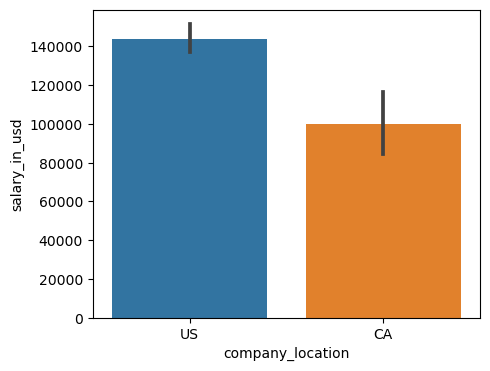

In [114]:
plt.figure(figsize=(5,4))
sns.barplot(data=dfNorthAmerica, x="company_location", y="salary_in_usd", order=dfNorthAmerica.sort_values('salary_in_usd', ascending = True).company_location.unique())
plt.show()

#### Sub Question 2: What are the salary levels of workers in Asia? 

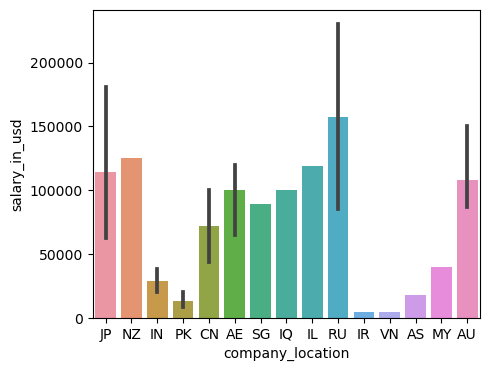

In [106]:
plt.figure(figsize=(5,4))
sns.barplot(data=dfAsia, x="company_location", y="salary_in_usd")
plt.show()

#### Sub Question 3: What are the salary levels of workers in Europe? 

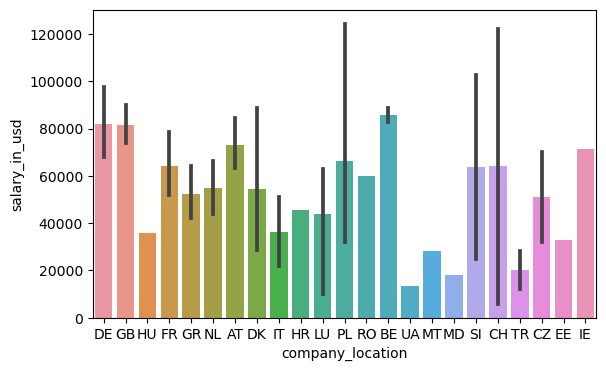

In [107]:
plt.figure(figsize=(6.5,4))
sns.barplot(data=dfEurope, x="company_location", y="salary_in_usd")
plt.show()

#### Sub Question 4: What are the salary levels of workers in South America? 

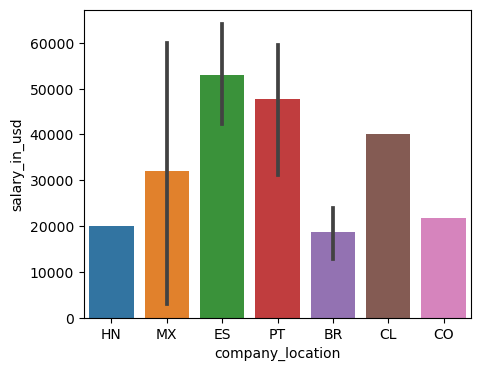

In [108]:
plt.figure(figsize=(5,4))
sns.barplot(data=dfSouthAmerica, x="company_location", y="salary_in_usd")
plt.show()

#### Sub Question 5: What are the salary levels of workers in Africa? 

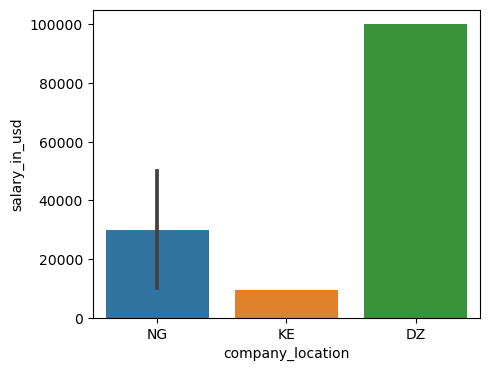

In [80]:
plt.figure(figsize=(5,4))
sns.barplot(data=dfAfrica, x="company_location", y="salary_in_usd")
plt.show()

#### barplot of different salary levels in all countries

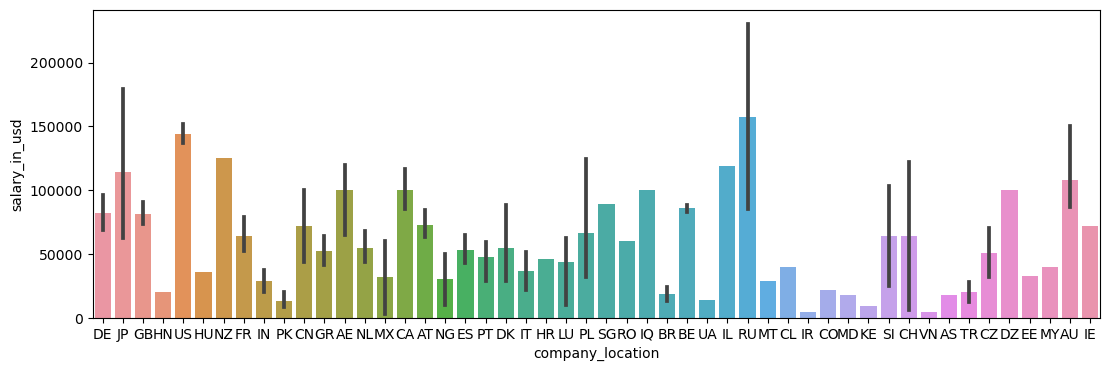

In [73]:
plt.figure(figsize=(13,4))
sns.barplot(data=dfWorld, x="company_location", y="salary_in_usd")
plt.show()